# OpenStreetMap

* It is an crowd-sourced dataset
* It contains data about streets, buildings, services, landuse etc.
* **OSMnx** is a package used to retrieve, construct, analyze and visualize street networks from OpenStreetMap and also retrieve data about points of interest such as restaurants, schools and lots of different kind of services.
* It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called **NetworkX**

### Get Street Network Graph for Tirupathi

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt

In [4]:
place_name = "Tirupathi, Andhra Pradesh, India"

In [5]:
graph = ox.graph_from_place(place_name)

In [6]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

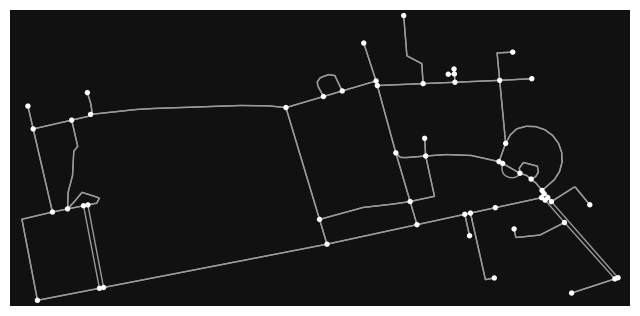

In [7]:
fig, ax = ox.plot_graph(graph)

In [9]:
nodes, edges = ox.graph_to_gdfs(graph)

In [10]:
nodes.head()

,y,x,street_count,geometry
osmid,,,,
3726004217,13.626082,79.391887,3,POINT (79.39189 13.62608)
3726082024,13.624080,79.381771,3,POINT (79.38177 13.62408)
3726082625,13.624315,79.383015,3,POINT (79.38302 13.62431)
3726082626,13.624330,79.383098,3,POINT (79.38310 13.62433)
3726082627,13.624499,79.393360,3,POINT (79.39336 13.62450)


In [11]:
edges.head()

osmid  highway  oneway  reversed   length  \
u          v          key                                                  
3726004217 3727759169 0    368755785  service   False      True  102.448   
           3726082692 0    368765668  service    True     False   11.398   
3726082024 3726082625 0    368755785  service   False     False  136.948   
           3726082653 0    368765683  service   False     False  247.024   
3726082625 3726082626 0    368755785  service   False     False    9.070   

                                                                    geometry  \
u          v          key                                                      
3726004217 3727759169 0    LINESTRING (79.39189 13.62608, 79.39096 13.62589)   
           3726082692 0    LINESTRING (79.39189 13.62608, 79.39189 13.626...   
3726082024 3726082625 0    LINESTRING (79.38177 13.62408, 79.38302 13.62431)   
           3726082653 0    LINESTRING (79.38177 13.62408, 79.38146 13.625...   
3726082625 3726082626 0    LINESTRING (79.38302 13.62431, 79.38310 13.62433)   

                          tunnel bridge  
u          v          key                
3726004217 3727759169 0      NaN    NaN  
           3726082692 0      NaN    NaN  
3726082024 3726082625 0      NaN    NaN  
           3726082653 0      NaN    NaN  
3726082625 3726082626 0      NaN    NaN

In [12]:
area = ox.geocode_to_gdf(place_name)

In [13]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [14]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((79.37901 13.62928, 79.38167 13.62409...",13.634066,13.623569,79.39373,79.379014,191306545,way,369041142,13.626914,79.386643,"Sri Venkateshwara Veterinary University, Tirup...",amenity,university,0.718072


<AxesSubplot: >

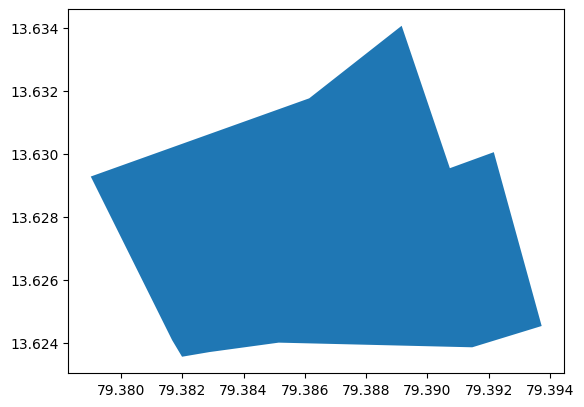

In [15]:
area.plot()

### Get Building information

In [43]:
tags = {"building":True}

In [44]:
buildings = ox.geometries_from_place(place_name,tags)

In [45]:
len(buildings)

103

In [46]:
buildings.head()

nodes  \
element_type osmid                                                          
way          368754138  [3725992120, 3725992118, 3725992325, 372599232...   
             368765639  [3727711369, 3727711372, 3727711373, 372771137...   
             368765640  [3726082631, 3726082641, 3726082638, 372608263...   
             368765641  [3726082662, 3726082681, 3726082697, 372608269...   
             368765644  [3726083018, 3726083020, 3726082991, 372608298...   

                       building  \
element_type osmid                
way          368754138      yes   
             368765639      yes   
             368765640      yes   
             368765641      yes   
             368765644      yes   

                                                                 geometry  \
element_type osmid                                                          
way          368754138  POLYGON ((79.38556 13.62655, 79.38560 13.62650...   
             368765639  POLYGON ((79.38762 13.62865, 79.38763 13.62865...   
             368765640  POLYGON ((79.38655 13.62537, 79.38662 13.62548...   
             368765641  POLYGON ((79.38255 13.62598, 79.38244 13.62610...   
             368765644  POLYGON ((79.38190 13.62782, 79.38196 13.62783...   

                       layer                              name ways type  
element_type osmid                                                        
way          368754138   NaN                               NaN  NaN  NaN  
             368765639   NaN                               NaN  NaN  NaN  
             368765640   NaN                               NaN  NaN  NaN  
             368765641     1  Admin Office (Dr. Y.S.R. Bhavan)  NaN  NaN  
             368765644   NaN                               NaN  NaN  NaN

In [20]:
buildings.shape

(103, 7)

In [51]:
# List key-value pairs for tags
tags = {"railway":True}

In [53]:
# Retrieve restaurants
railway = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(railway)

1

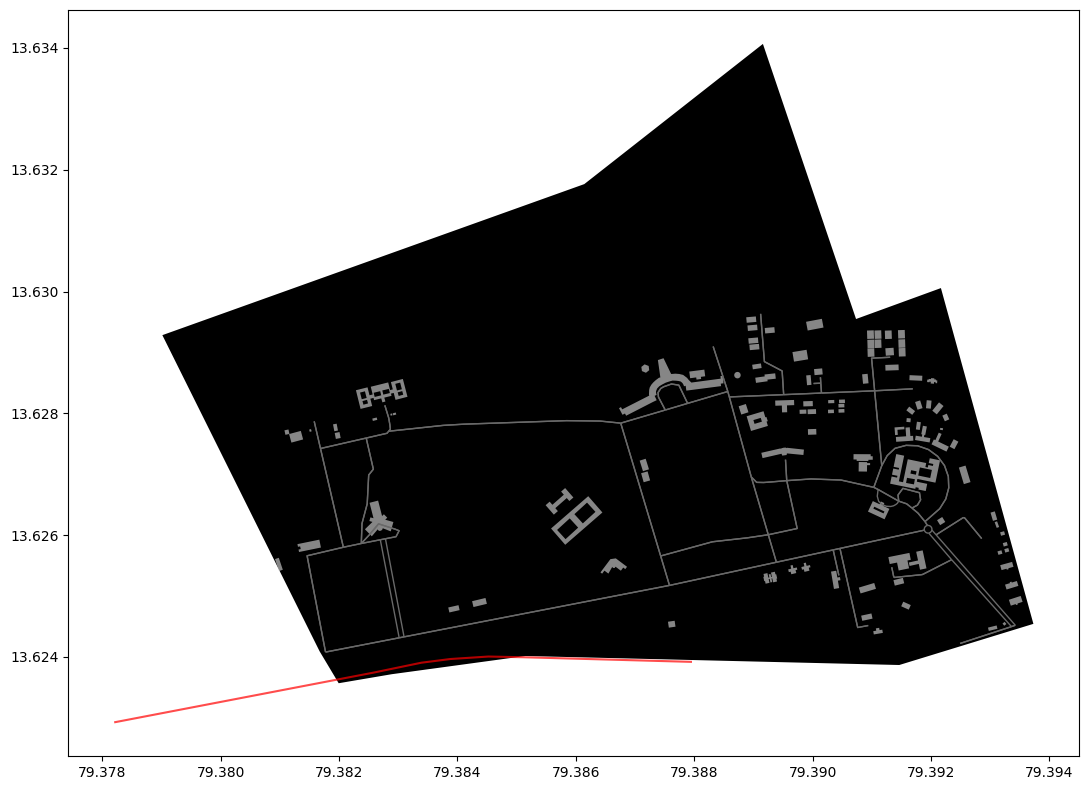

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
railway.plot(ax=ax, color="red", alpha=0.7, markersize=20)
plt.tight_layout()

### Get Park Information

In [62]:
tags = {"leisure": "park", "landuse": "grass"}

In [63]:
parks = ox.geometries_from_place(place_name, tags)
print("Retrieved", len(parks), "objects")

Retrieved 5 objects


In [64]:
parks.head(3)

nodes  \
element_type osmid                                                          
way          368765686  [3726082943, 3726082942, 3726082954, 372608295...   
             368765687  [3726082995, 3726082981, 3726082971, 372608299...   
             368765688  [3726083023, 3726083010, 3726082983, 372608300...   

                       landuse  \
element_type osmid               
way          368765686   grass   
             368765687   grass   
             368765688   grass   

                                                                 geometry  
element_type osmid                                                         
way          368765686  POLYGON ((79.38144 13.62756, 79.38141 13.62755...  
             368765687  POLYGON ((79.38149 13.62773, 79.38150 13.62770...  
             368765688  POLYGON ((79.38150 13.62785, 79.38152 13.62778...

<AxesSubplot: >

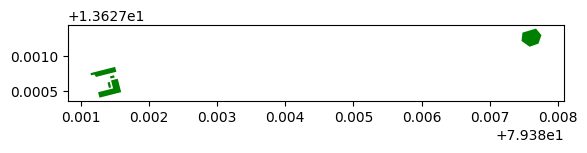

In [65]:
parks.plot(color='green')

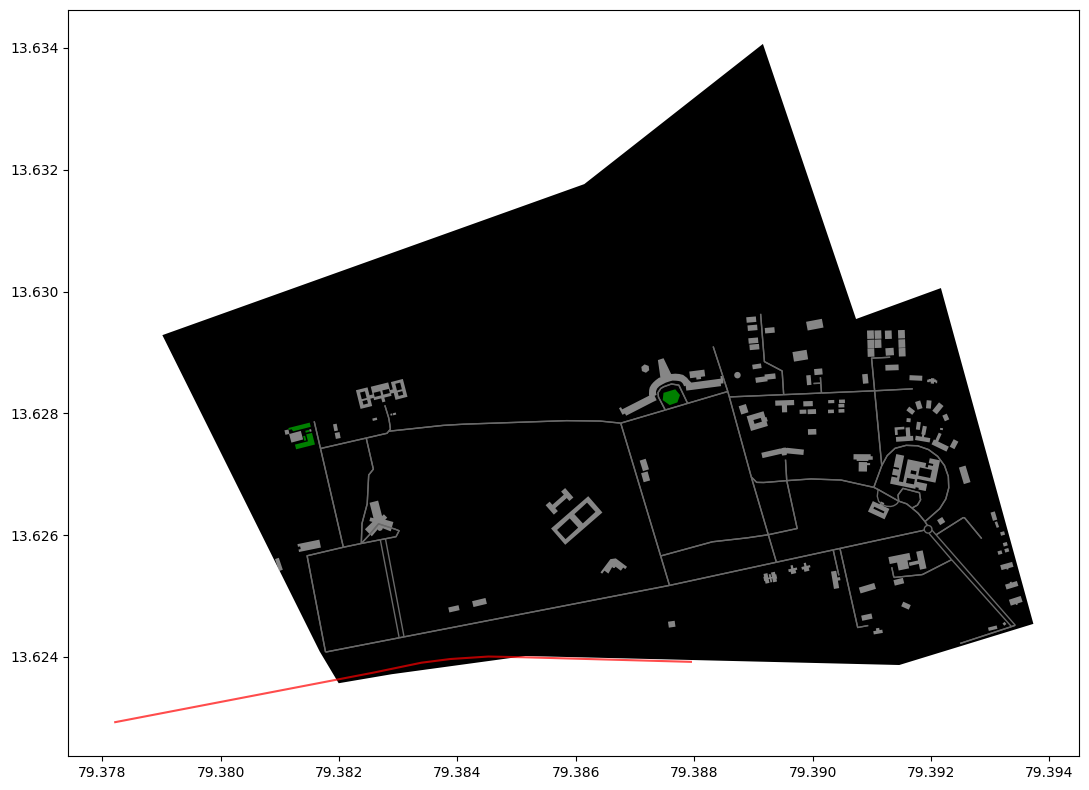

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
railway.plot(ax=ax, color="red", alpha=0.7, markersize=20)
plt.tight_layout()